In [1]:
import pandas as pd
#Load the data from a csv file
data = pd.read_csv('sales_data.csv')
#Convert the timestamp column tyo datatime type
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [2]:
#Rename the columns to 'ds' and 'y'
data = data.rename(columns={'timestamp':'ds', 'sales':'y'})

In [3]:
# pip install prophet
from prophet import Prophet
# creating the prophet model object
model = Prophet()
# fitting the data
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigx_1sxj/k0an18r8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigx_1sxj/cqakq_ag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91547', 'data', 'file=/tmp/tmpigx_1sxj/k0an18r8.json', 'init=/tmp/tmpigx_1sxj/cqakq_ag.json', 'output', 'file=/tmp/tmpigx_1sxj/prophet_modelt3leonz7/prophet_model-20230810192635.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:26:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:26:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [4]:
future_dates = model.make_future_dataframe(periods=365*2, freq='D')

In [5]:
forecast = model.predict(future_dates)

<Figure size 640x480 with 0 Axes>

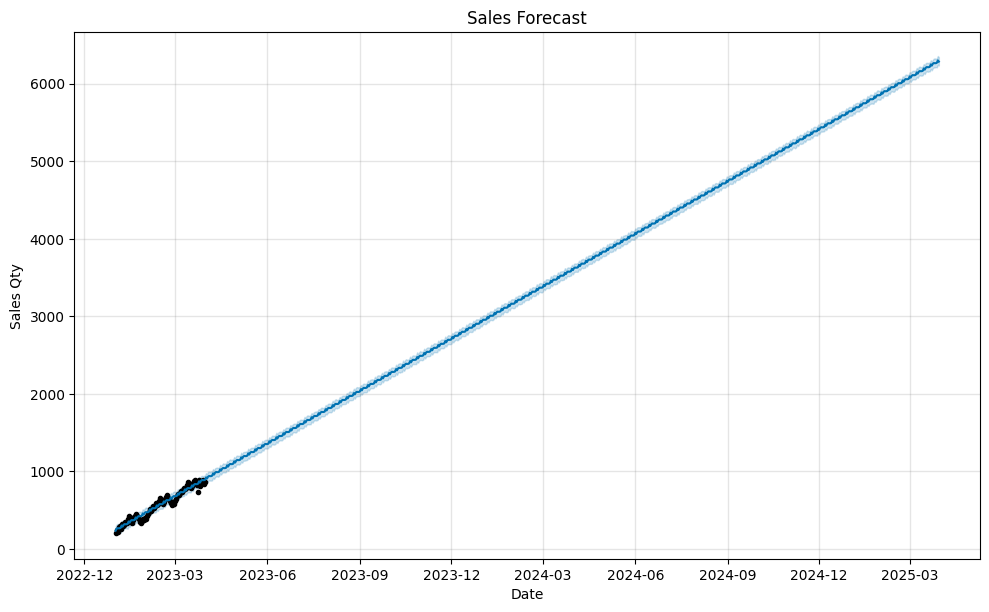

In [6]:
# Plot the forecasted sales
import matplotlib.pyplot as plt
plt.figure()
model.plot(forecast, xlabel='Date', ylabel='Sales Qty')
plt.title('Sales Forecast')
plt.show()

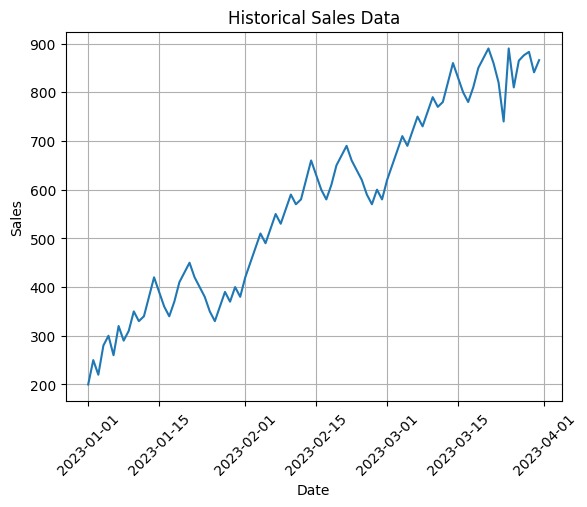

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('sales_data.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
plt.plot(data['timestamp'], data['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Historical Sales Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()